Лучшая модель сохранена в best_model.joblib
{'clf': DecisionTreeClassifier(), 'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Лучшая модель: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                                        min_samples_leaf=2))])

Отчёт классификации:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86       271
           1       0.38      0.65      0.48        52

    accuracy                           0.77       323
   macro avg       0.65      0.73      0.67       323
weighted avg       0.84      0.77      0.80       323



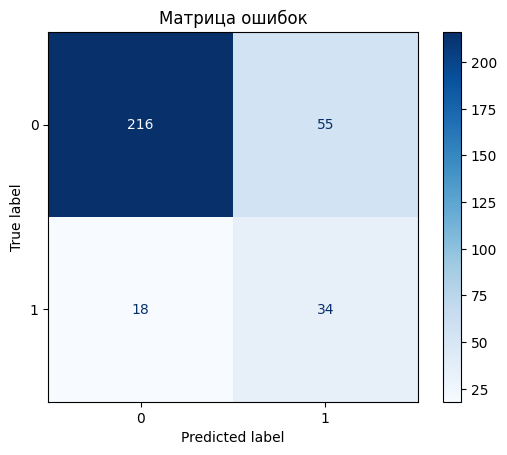

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

def read_dataset(path, sep=';', encoding='utf-8-sig', low_memory=False):
    return pd.read_csv(path, sep=sep, encoding=encoding, low_memory=low_memory)

df = read_dataset("../../data/datasets/1st_course_bak_spec.csv")

X = df.drop(columns=['Таргет'])
y = df['Таргет']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

param_grid = [
    {
        'clf': [DecisionTreeClassifier()],
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [2, 3, 5, 10, 20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
        'clf__min_samples_split': [2, 5, 10, 12, 15],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced']
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../data/models/dec_tree_model_bak_spec.joblib')

print("Лучшая модель сохранена в best_model.joblib")
print(grid_search.best_params_)
print("Лучшая модель:", grid_search.best_estimator_)
print("\nОтчёт классификации:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.named_steps['clf'].classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.show()


In [2]:
clf = grid_search.best_estimator_
probabilities = clf.predict_proba(X_test)[:, 1]

In [3]:
threshold = 0.3
y_pred = (probabilities > threshold).astype(int)

In [4]:
from sklearn.metrics import recall_score, precision_score

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

Recall: 0.7308
Precision: 0.3393


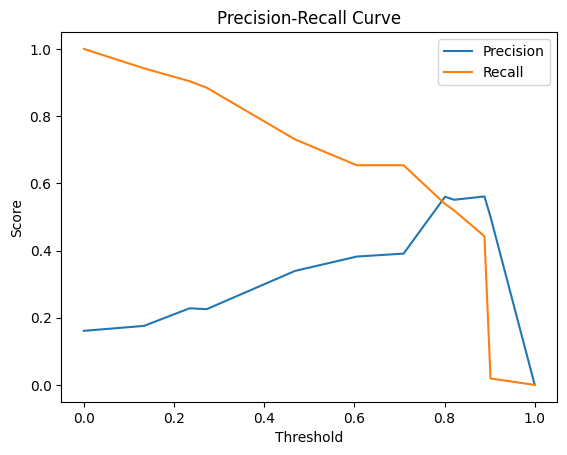

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

In [42]:
importances = clf.named_steps['clf'].feature_importances_
print("Важность признаков:", importances)
print(sum(importances))

Важность признаков: [3.68973949e-02 1.16094384e-01 0.00000000e+00 2.08005939e-01
 0.00000000e+00 6.09444535e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.24303933e-01 2.91326595e-02 0.00000000e+00
 4.80478174e-02 3.67646701e-02 0.00000000e+00 1.24899624e-15
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.12799675e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.57797269e-02 0.00000000e+00
 0.00000000e+00 3.14856156e-02 0.00000000e+00 2.95337057e-02
 1.17297333e-02 0.00000000e+00]
1.0


In [43]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,  
    'importance': importances
}).sort_values('importance', ascending=False)

print(feature_importances)

                                            feature    importance
9              Прошло лет с окончания уч. заведения  3.243039e-01
3                           Балл за инд. достижения  2.080059e-01
1                            Cумма баллов испытаний  1.160944e-01
5                                          Контракт  6.094445e-02
20                                       Специалист  5.127997e-02
12                 Полных лет на момент поступления  4.804782e-02
0                                         Приоритет  3.689739e-02
13                                     Особая квота  3.676467e-02
33                            Код направления 1: 27  3.148562e-02
35                             Код направления 3: 2  2.953371e-02
10                                 FromEkaterinburg  2.913266e-02
30                                           others  1.577973e-02
36                             Код направления 3: 3  1.172973e-02
15                                    Целевая квота  1.248996e-15
4         

Лучшая модель сохранена в best_model.joblib
{'clf': DecisionTreeClassifier(), 'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 2, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Лучшая модель: Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=2))])

Отчёт классификации:
               precision    recall  f1-score   support

           0       0.96      0.37      0.53       117
           1       0.17      0.88      0.28        17

    accuracy                           0.43       134
   macro avg       0.56      0.62      0.41       134
weighted avg       0.86      0.43      0.50       134



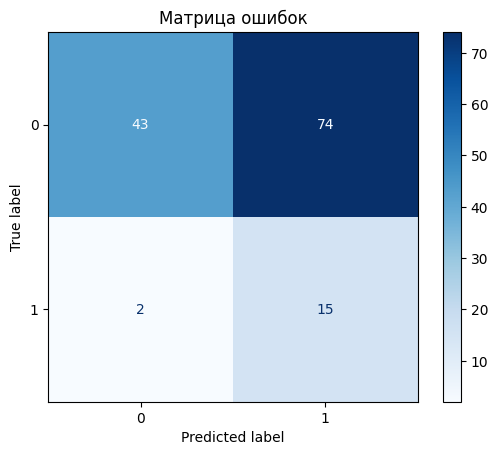

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def read_dataset(path, sep=';', encoding='utf-8-sig', low_memory=False):
    return pd.read_csv(path, sep=sep, encoding=encoding, low_memory=low_memory)

df = read_dataset("../../data/datasets/1st_course_magistr.csv")

X = df.drop(columns=['Таргет'])
y = df['Таргет']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

param_grid = [
    {
        'clf': [DecisionTreeClassifier()],
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [2, 3, 5, 10, 20, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40],
        'clf__min_samples_split': [2, 5, 10, 12, 15],
        'clf__min_samples_leaf': [1, 2, 5],
        'clf__class_weight': [None, 'balanced']
    }
]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

best_model = grid_search.best_estimator_
joblib.dump(best_model, '../../data/models/1st_course_dec_tree_model_magistr.joblib')

print("Лучшая модель сохранена в best_model.joblib")
print(grid_search.best_params_)
print("Лучшая модель:", grid_search.best_estimator_)
print("\nОтчёт классификации:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.named_steps['clf'].classes_)
disp.plot(cmap="Blues")
plt.title("Матрица ошибок")
plt.show()

In [2]:
import pandas as pd

def read_dataset(path, sep=';', encoding='utf-8-sig', low_memory=False):
    return pd.read_csv(path, sep=sep, encoding=encoding, low_memory=low_memory)

df = read_dataset("../../data/datasets/1st_course_bak_spec.csv")

In [3]:
df.columns

Index(['Приоритет', 'Cумма баллов испытаний', 'БВИ', 'Балл за инд. достижения',
       'Категория конкурса БВИ', 'Контракт', 'Нуждается в общежитии',
       'Иностранный абитуриент (МОН)', 'Таргет', 'Пол',
       'Полных лет на момент поступления',
       'Прошло лет с окончания уч. заведения', 'fromEkaterinburg',
       'fromSverdlovskRegion', 'Human Development Index', 'Особая квота',
       'Отдельная квота', 'Целевая квота',
       'всероссийская олимпиада школьников (ВОШ)',
       'олимпиада из перечня, утвержденного МОН РФ (ОШ)', 'Заочная',
       'Очно-заочная', 'Специалист', 'Военное уч. заведение', 'Высшее',
       'Профильная Школа', 'СПО', 'Боевые действия', 'Инвалиды',
       'Квота для иностранных граждан', 'Сироты', 'PostSoviet', 'others',
       'Код направления 1: 10', 'Код направления 1: 11',
       'Код направления 1: 27', 'Код направления 1: 29',
       'Код направления 3: 2', 'Код направления 3: 3', 'Код направления 3: 4'],
      dtype='object')